In [1]:
import os

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import urllib.request
import seaborn as sns
import plotly.express as px
import folium
from random import sample
import geopandas as gpd

from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

/Users/chloeroudaut/anaconda3/envs/myenv/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('scaled_features.csv')

In [3]:
data.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'avg_order_value',
       'std_order_value', 'unique_products_count', 'avg_delivery_time',
       'avg_review_score', 'installment_payment_count'],
      dtype='object')

In [4]:
# 2. Préparation des données
# Sélection des features pour le clustering (excluons customer_id)
features = ['recency', 'frequency', 'monetary', 'avg_order_value', 'std_order_value', 
            'unique_products_count', 'avg_delivery_time', 'avg_review_score', 'installment_payment_count']

X = data[features]

# 3. Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 4. K-means clustering
# Nous allons essayer avec 3 à 6 clusters
n_clusters_range = range(3, 7)
inertias = []
silhouette_scores = []



In [6]:
sample_size = 10000  # Ajustez selon vos besoins
X_sample = X_scaled[np.random.choice(X_scaled.shape[0], sample_size, replace=False)]

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_sample)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_sample, kmeans.labels_))


Cluster 0:
recency                     -0.012258
frequency                   -0.039414
monetary                    -0.011605
avg_order_value              0.056440
std_order_value             -0.012546
unique_products_count       -0.165962
avg_delivery_time            0.891222
avg_review_score            -1.867674
installment_payment_count    0.010052
dtype: float64

Cluster 1:
recency                      0.992312
frequency                   -0.116962
monetary                    -0.071947
avg_order_value             -0.049813
std_order_value             -0.016070
unique_products_count       -0.167434
avg_delivery_time           -0.064589
avg_review_score             0.372376
installment_payment_count   -0.016373
dtype: float64

Cluster 2:
recency                      0.004484
frequency                    2.518793
monetary                     1.518417
avg_order_value              1.073432
std_order_value              0.399237
unique_products_count        3.597001
avg_delivery_time     

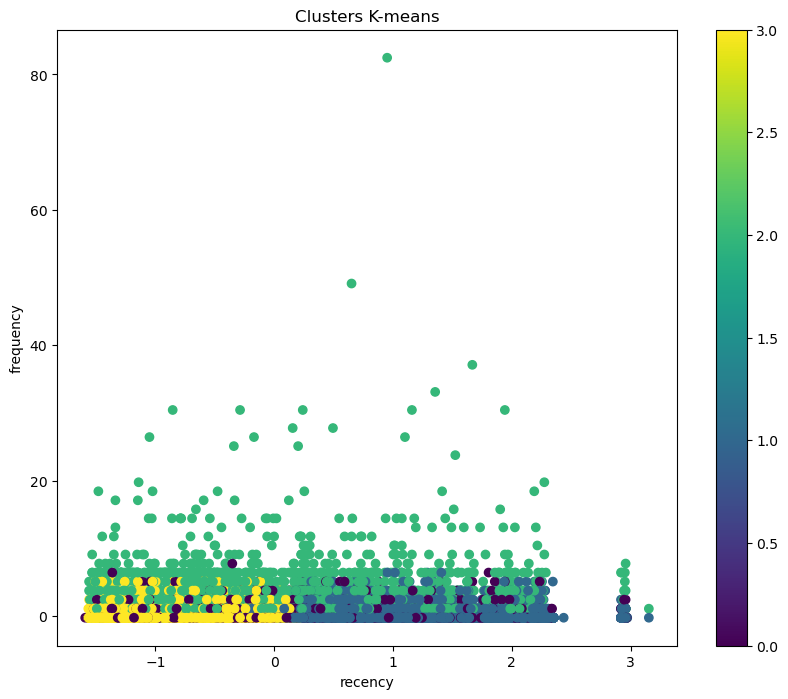

In [8]:

# 6. Choix du nombre optimal de clusters
# Basé sur les graphiques, choisissez le nombre optimal de clusters
optimal_clusters = 4  # À ajuster en fonction des résultats

# 7. Application du K-means final
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# 8. Ajout des labels de cluster au DataFrame original
data['Cluster'] = cluster_labels

# 9. Analyse des clusters
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data[features].mean())

# 10. Visualisation 2D (utilisant les deux premières features comme exemple)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clusters K-means')
plt.colorbar(scatter)
plt.show()

Cluster 0 : "Clients satisfaits mais lents"

Caractéristiques principales : Temps de livraison très long (0.891222), satisfaction client très basse (-1.867674)
Comportement : Proche de la moyenne sur la plupart des autres métriques
Interprétation : Ces clients semblent tolérer des temps de livraison longs, mais cela affecte négativement leur satisfaction. Ils restent des clients moyens en termes de fréquence et de valeur monétaire.


Cluster 1 : "Clients récents et satisfaits"

Caractéristiques principales : Récence très élevée (0.992312), satisfaction client au-dessus de la moyenne (0.372376)
Comportement : Légèrement en dessous de la moyenne pour la fréquence et la valeur monétaire
Interprétation : Ce groupe semble représenter des clients récents, potentiellement des nouveaux clients, qui sont satisfaits de leur expérience mais n'ont pas encore établi un historique d'achat important.


Cluster 2 : "Clients VIP à haute valeur"

Caractéristiques principales : Fréquence très élevée (2.518793), valeur monétaire élevée (1.518417), grande variété de produits achetés (3.597001)
Comportement : Au-dessus de la moyenne sur presque toutes les métriques, sauf la satisfaction client (-0.484530)
Interprétation : Ce sont vos clients les plus précieux, qui achètent fréquemment, dépensent beaucoup et achètent une grande variété de produits. Cependant, leur satisfaction est légèrement inférieure à la moyenne, ce qui pourrait être un point d'attention.


Cluster 3 : "Clients anciens et satisfaits"

Caractéristiques principales : Récence très basse (-0.755499), satisfaction client au-dessus de la moyenne (0.409067)
Comportement : Légèrement en dessous de la moyenne pour la plupart des autres métriques
Interprétation : Ces clients n'ont pas acheté récemment, mais restent satisfaits. Ils pourraient être des clients fidèles qui n'ont pas eu besoin de faire un achat récemment, ou des clients à risque de churn malgré leur satisfaction.
Recommandations :


Pour le Cluster 0 : Améliorez les temps de livraison pour augmenter la satisfaction client.

Pour le Cluster 1 : Concentrez-vous sur la rétention et l'augmentation de la valeur de ces nouveaux clients satisfaits.

Pour le Cluster 2 : Investiguer pourquoi ces clients VIP ont une satisfaction inférieure à la moyenne et mettez en place des actions pour l'améliorer.

Pour le Cluster 3 : Lancez une campagne de réactivation pour encourager ces clients satisfaits à faire de nouveaux achats.

Cette segmentation vous permet de cibler vos efforts marketing et d'amélioration de service en fonction des caractéristiques spécifiques de chaque groupe de clients.


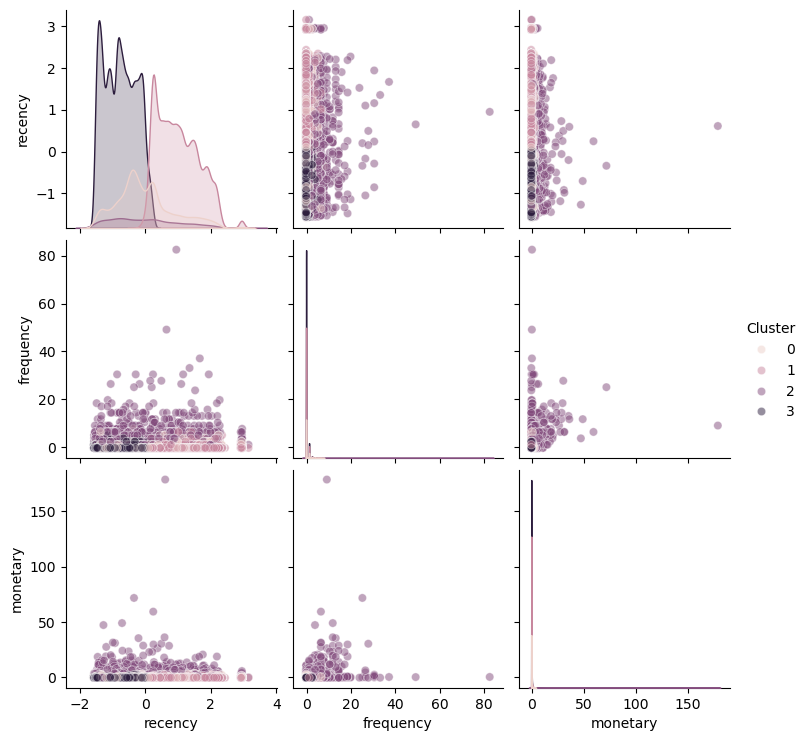

In [10]:
import seaborn as sns

features_to_plot = ['recency', 'frequency', 'monetary']
sns.pairplot(data[features_to_plot + ['Cluster']], hue='Cluster', plot_kws={'alpha': 0.5})
plt.show()

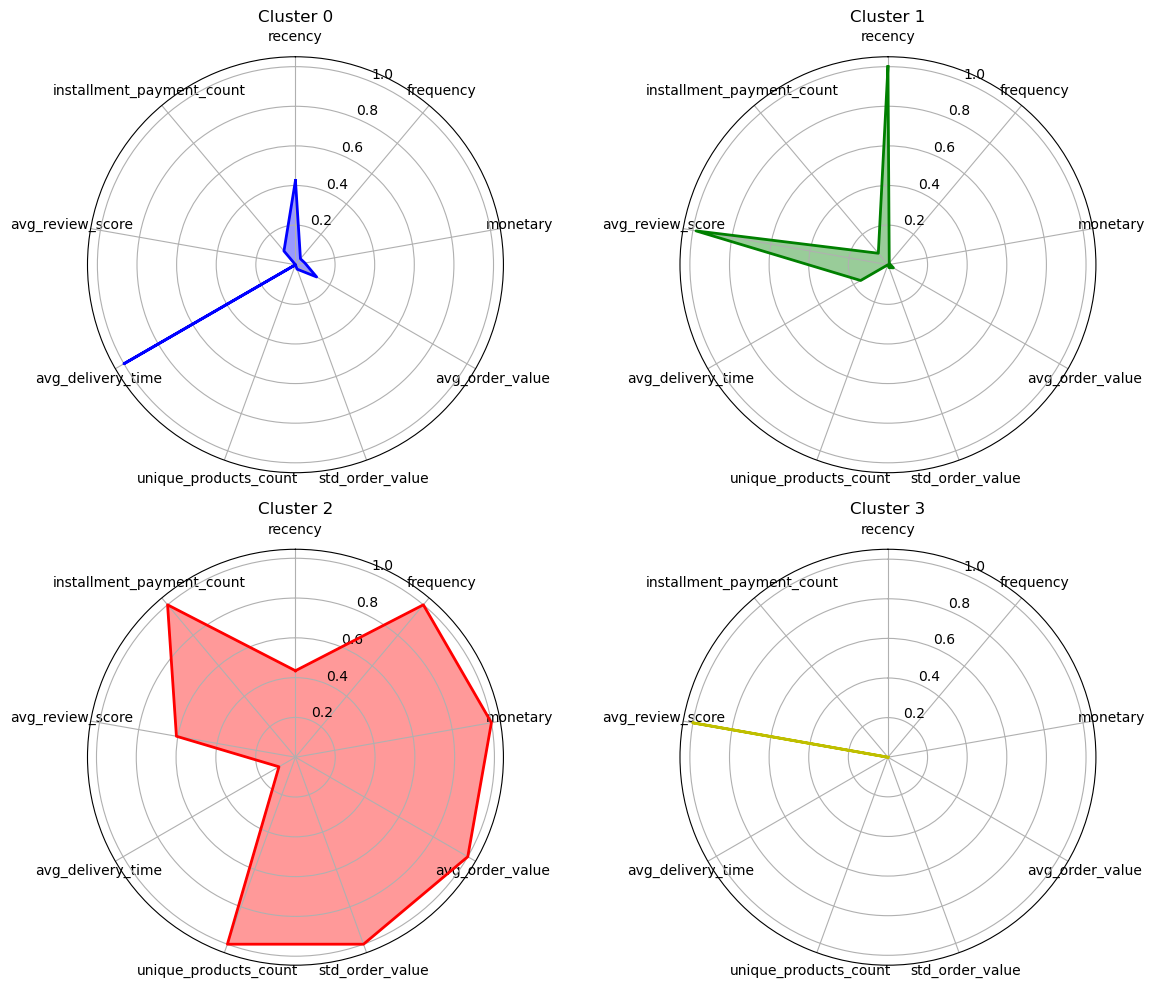

In [11]:
from math import pi

def make_spider(df, row, title, color):
    categories = list(df.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(2, 2, row+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_title(title)
    
    values = df.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

# Préparer les données
cluster_means = data.groupby('Cluster')[features].mean()
cluster_means_scaled = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Créer le plot
plt.figure(figsize=(12, 10))
colors = ['b', 'g', 'r', 'y']
for i in range(4):
    make_spider(cluster_means_scaled, i, f'Cluster {i}', colors[i])
plt.tight_layout()
plt.show()

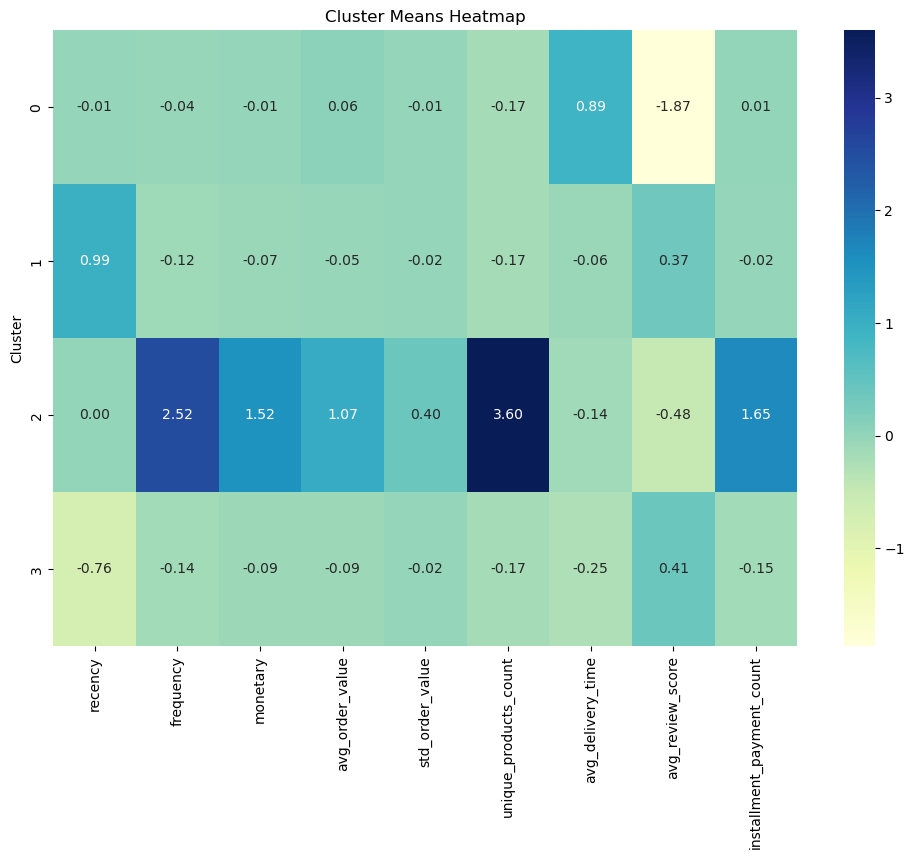

In [13]:
cluster_means = data.groupby('Cluster')[features].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Means Heatmap')
plt.show()

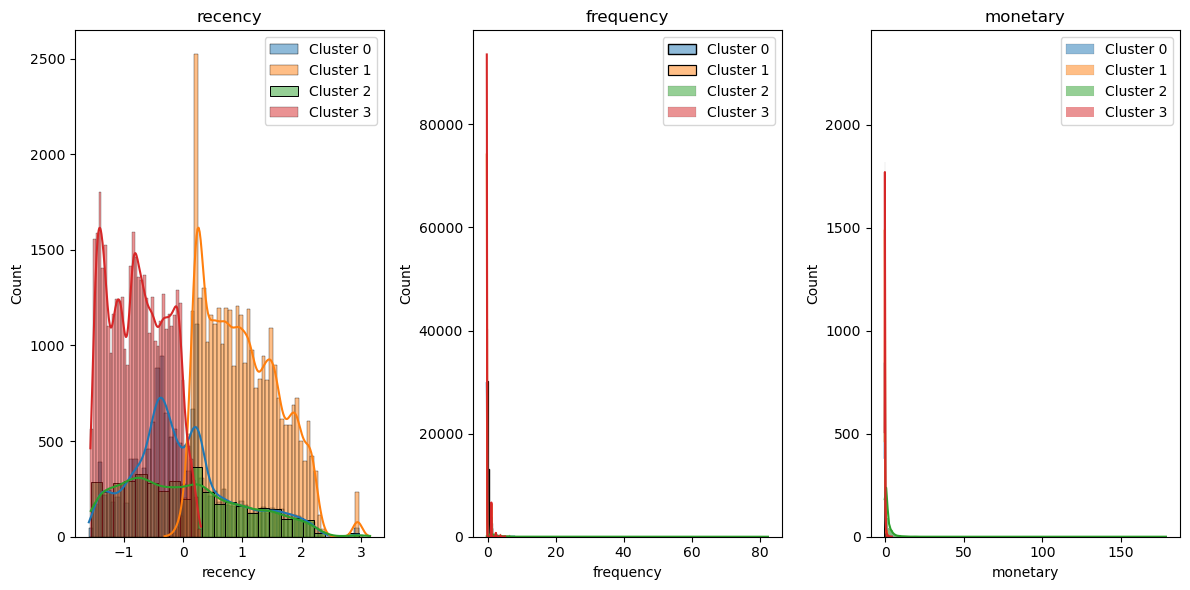

In [14]:
plt.figure(figsize=(12, 6))
for feature in ['recency', 'frequency', 'monetary']:
    plt.subplot(1, 3, features.index(feature) + 1)
    for cluster in range(4):
        sns.histplot(data[data['Cluster'] == cluster][feature], 
                     label=f'Cluster {cluster}', kde=True, alpha=0.5)
    plt.title(feature)
    plt.legend()
plt.tight_layout()
plt.show()